In [1]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Работа с данными для выполнения заданий 

сюда можно добавить преобразование набора данных для достижения более точной работы
выбранной модели

In [2]:
import pandas as pd #Импортируем библиотеки
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import psycopg2 
import json
 
def connect_db(): 
    conn = psycopg2.connect(dbname="User", 
                            user="postgres",  
                            password="1234", 
                            host='localhost') 
    cur = conn.cursor() 
    return conn, cur 


In [3]:
def fetch_data(query): 
    conn, cur = connect_db() 
    cur.execute(query) 
    data = cur.fetchall() 
    columns = [desc[0] for desc in cur.description] 
    conn.close() 
    return pd.DataFrame(data, columns=columns) 
 
# запрос данных из базы данных 
query = "SELECT * FROM expenses;" 
df_expenses = fetch_data(query) 

def fetch_data(query): 
    conn, cur = connect_db() 
    cur.execute(query) 
    data = cur.fetchall() 
    columns = [desc[0] for desc in cur.description] 
    conn.close() 
    return pd.DataFrame(data, columns=columns) 
 
# запрос данных из базы данных 
query = "SELECT * FROM orders;" 
df_orders = fetch_data(query) 

def fetch_data(query): 
    conn, cur = connect_db()
    cur.execute(query) 
    data = cur.fetchall() 
    columns = [desc[0] for desc in cur.description] 
    conn.close() 
    return pd.DataFrame(data, columns=columns) 
 
# запрос данных из базы данных 
query = "SELECT * FROM visitation;" 
df_visitation = fetch_data(query) 

In [4]:
df_merged = pd.merge(df_visitation, df_orders, on='User Id', how='left') 

In [5]:
df_visitation_2 = df_visitation.copy(deep=True)

In [6]:
df_visitation['Session End'] = pd.to_datetime(df_visitation['Session End'])

In [7]:
df_visitation['Session End'] = pd.to_datetime(df_visitation['Session End']).dt.date

In [8]:
df_visitation_2 #проверка

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,Turkey,PC,LeapBob,2022-10-31 13:28:12,2022-10-31 14:39:29
309897,334903592310,Thailand,PC,lambdaMediaAds,2022-10-31 22:14:52,2022-10-31 22:39:36
309898,540102010126,China,PC,organic,2022-10-31 01:40:48,2022-10-31 01:41:31
309899,308736936846,China,Mac,organic,2022-10-31 07:37:34,2022-10-31 07:37:55


In [9]:
df_merged #проверка

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01,NaT,NaN
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35,NaT,NaN
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08,NaT,NaN
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25,NaT,NaN
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40,NaT,NaN
...,...,...,...,...,...,...,...,...
840476,329994900775,Turkey,PC,LeapBob,2022-10-31 13:28:12,2022-10-31 14:39:29,2022-10-31 13:29:06,4.99
840477,334903592310,Thailand,PC,lambdaMediaAds,2022-10-31 22:14:52,2022-10-31 22:39:36,NaT,NaN
840478,540102010126,China,PC,organic,2022-10-31 01:40:48,2022-10-31 01:41:31,NaT,NaN
840479,308736936846,China,Mac,organic,2022-10-31 07:37:34,2022-10-31 07:37:55,NaT,NaN


In [10]:
df_merged = pd.merge(df_visitation, df_orders, on='User Id', how='left') 

In [11]:
#объединение данных по User Id 
df_expenses['dt'] = pd.to_datetime(df_expenses['dt']).dt.date
df_merged = pd.merge(df_merged, df_expenses, left_on=['Session End', 'Channel'], right_on=['dt', 'Channel'], how='left')
#преобразование типов данных 
 
#добавление информации о дате первого посещения пользователя 
first_visit_dates = df_merged.groupby('User Id')['Session Start'].min().reset_index() 
first_visit_dates.columns = ['User Id', 'First Visit Date'] 
df_merged = pd.merge(df_merged, first_visit_dates, on='User Id', how='left') 
 

In [12]:
df = df_merged.copy(deep=True)

In [13]:
df_visitation_2

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,Turkey,PC,LeapBob,2022-10-31 13:28:12,2022-10-31 14:39:29
309897,334903592310,Thailand,PC,lambdaMediaAds,2022-10-31 22:14:52,2022-10-31 22:39:36
309898,540102010126,China,PC,organic,2022-10-31 01:40:48,2022-10-31 01:41:31
309899,308736936846,China,Mac,organic,2022-10-31 07:37:34,2022-10-31 07:37:55


In [14]:
df_merged['Session End'] = df_visitation_2['Session End'] 

In [15]:
df_merged

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue,dt,costs,First Visit Date
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01,NaT,NaN,NaN,NaN,2022-05-01 02:36:01
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35,NaT,NaN,NaN,NaN,2022-05-01 04:46:31
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08,NaT,NaN,NaN,NaN,2022-05-01 14:09:25
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25,NaT,NaN,2022-05-01,80.0,2022-05-01 00:29:59
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40,NaT,NaN,NaN,NaN,2022-05-01 03:33:35
...,...,...,...,...,...,...,...,...,...,...,...
840476,329994900775,Turkey,PC,LeapBob,2022-10-31 13:28:12,NaT,2022-10-31 13:29:06,4.99,NaN,NaN,2022-10-27 18:17:40
840477,334903592310,Thailand,PC,lambdaMediaAds,2022-10-31 22:14:52,NaT,NaT,NaN,NaN,NaN,2022-10-27 05:26:06
840478,540102010126,China,PC,organic,2022-10-31 01:40:48,NaT,NaT,NaN,NaN,NaN,2022-10-27 04:03:43
840479,308736936846,China,Mac,organic,2022-10-31 07:37:34,NaT,NaT,NaN,NaN,NaN,2022-10-27 05:48:33


In [16]:
 df_merged.dropna() #удаление пропусков

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue,dt,costs,First Visit Date
24,188246423999,Russia,Android,FaceBoom,2022-05-01 23:09:42,2022-05-01 23:21:06,2022-05-01 23:09:52,4.99,2022-05-01,113.300,2022-05-01 23:09:42
29,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 14:39:33,2022-05-02 06:30:36,4.99,2022-05-01,80.000,2022-05-01 13:25:07
30,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 16:45:47,2022-05-04 23:46:23,5.99,2022-05-01,80.000,2022-05-01 13:25:07
31,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 18:50:54,2022-05-12 22:02:22,4.99,2022-05-01,80.000,2022-05-01 13:25:07
32,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 13:53:48,2022-05-16 00:03:32,4.99,2022-05-01,80.000,2022-05-01 13:25:07
...,...,...,...,...,...,...,...,...,...,...,...
309893,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 07:38:52,2022-08-27 01:00:26,9.99,2022-08-20,339.000,2022-08-13 00:56:23
309894,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 11:50:29,2022-08-29 19:09:30,4.99,2022-08-20,339.000,2022-08-13 00:56:23
309895,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 11:50:29,2022-09-13 05:01:23,4.99,2022-08-20,339.000,2022-08-13 00:56:23
309899,429722749550,Russia,iPhone,RocketSuperAds,2022-08-20 00:28:18,2022-10-31 07:37:55,2022-08-16 15:43:38,4.99,2022-08-20,6.175,2022-08-13 06:48:00


In [17]:
df_merged = df_merged.dropna()

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160257 entries, 24 to 309900
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   User Id           160257 non-null  int64         
 1   Region            160257 non-null  object        
 2   Device            160257 non-null  object        
 3   Channel           160257 non-null  object        
 4   Session Start     160257 non-null  datetime64[ns]
 5   Session End       160257 non-null  datetime64[ns]
 6   Event Dt          160257 non-null  datetime64[ns]
 7   Revenue           160257 non-null  float64       
 8   dt                160257 non-null  object        
 9   costs             160257 non-null  float64       
 10  First Visit Date  160257 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 14.7+ MB


In [19]:
df = df_merged.dropna()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160257 entries, 24 to 309900
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   User Id           160257 non-null  int64         
 1   Region            160257 non-null  object        
 2   Device            160257 non-null  object        
 3   Channel           160257 non-null  object        
 4   Session Start     160257 non-null  datetime64[ns]
 5   Session End       160257 non-null  datetime64[ns]
 6   Event Dt          160257 non-null  datetime64[ns]
 7   Revenue           160257 non-null  float64       
 8   dt                160257 non-null  object        
 9   costs             160257 non-null  float64       
 10  First Visit Date  160257 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 14.7+ MB


# 3.1 Сегментация пользователей

In [21]:
#3.1 Сегментация пользователей
df['Event Dt'] = pd.to_datetime(df['Event Dt']) 
df['dt'] = pd.to_datetime(df['dt']) 
 
#Recency, Frequency, Monetary 
max_date = df['Event Dt'].max() 
rfm = df.groupby('User Id').agg({ 
    'Event Dt': lambda x: (max_date - x.max()).days,  # Recency 
    'dt': 'count',  # Frequency 
    'Revenue': 'sum'  # Monetary 
}).reset_index() 
 
rfm.columns = ['User Id', 'Recency', 'Frequency', 'Monetary'] 
 
# Сегментация пользователей
# Создание квантилей для каждого параметра RFM
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75]) 
quantiles = quantiles.to_dict() 
 
# Функция назначения сегментов
def rfm_segment(row): 
    recency = row['Recency'] 
    if recency <= quantiles['Recency'][0.25]: 
        return '1'  #лучший 
    elif recency <= quantiles['Recency'][0.5]: 
        return '2'  #хороший 
    elif recency <= quantiles['Recency'][0.75]: 
        return '3'  #не очень хороший
    else: 
        return '4'  #худший
 
#Применяем функцию к каждой строке
rfm['RFM Segment'] = rfm.apply(rfm_segment, axis=1) 
 
rfm.head() #таблица с сегментация пользователей
 

,User Id,Recency,Frequency,Monetary,RFM Segment
0,599326,175,9,44.91,4
1,374052872,4,16,79.84,1
2,414791703,12,170,848.30,1
3,785077127,31,154,1398.46,2
4,1053634008,129,3,14.97,4


In [22]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User Id      3615 non-null   int64  
 1   Recency      3615 non-null   int64  
 2   Frequency    3615 non-null   int64  
 3   Monetary     3615 non-null   float64
 4   RFM Segment  3615 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 141.3+ KB


In [23]:
#Проверка распределения сегментов
print(rfm['RFM Segment'].value_counts())

RFM Segment
1    923
3    899
2    897
4    896
Name: count, dtype: int64


In [65]:
# Для каждого сегмента пользователей вычислим среднее время между их покупками после первого визита 
avg_time_between_purchases = rfm.groupby('RFM Segment')['Recency'].mean() 
 
# Выведем среднее время между покупками для каждого сегмента 
print("Среднее время между покупками для каждого сегмента:") 
print(avg_time_between_purchases)

Среднее время между покупками для каждого сегмента:
RFM Segment
1      9.435536
2     48.978818
3    100.935484
4    147.718750
Name: Recency, dtype: float64


Для сегмента 1 среднее время между покупками составляет около 9.4 дней. 
Для сегмента 2 среднее время между покупками значительно выше и составляет около 49 дней. 
Для сегмента 3 среднее время между покупками еще больше и составляет около 100.9 дней. 
Для сегмента 4 среднее время между покупками самое высокое и составляет около 147.7 дней. 
Это означает, что пользователи из разных сегментов проявляют различное поведение по частоте покупок. Пользователи из сегмента 1 чаще всего делают покупки, в то время как пользователи из сегментов 3 и 4 делают покупки реже.

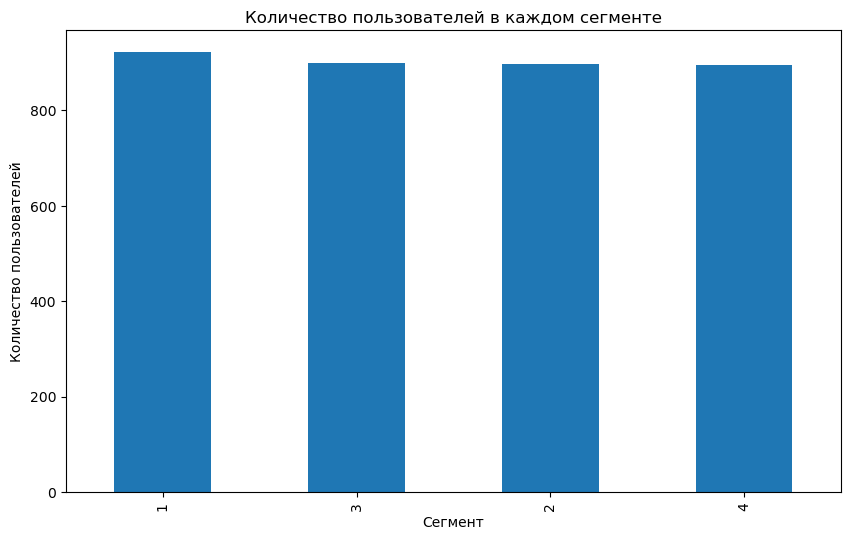

In [48]:
# Построим гистограмму или boxplot для количества покупок для каждого сегмента 
import matplotlib.pyplot as plt 
 
plt.figure(figsize=(10, 6)) 
rfm['RFM Segment'].value_counts().plot(kind='bar') 
plt.title('Количество пользователей в каждом сегменте') 
plt.xlabel('Сегмент') 
plt.ylabel('Количество пользователей') 
plt.show()

везде +- одинаково но 1 сегмента больше

In [49]:
# Проведем анализ времени между покупками для каждого сегмента 
time_between_purchases_analysis = rfm.groupby('RFM Segment')['Recency'].describe()  
 
# Выведем статистику по времени между покупками для каждого сегмента 
print("Статистика по времени между покупками для каждого сегмента:") 
print(time_between_purchases_analysis)

Статистика по времени между покупками для каждого сегмента:
             count        mean        std    min    25%    50%    75%    max
RFM Segment                                                                 
1            923.0    9.435536   6.384882    0.0    4.0    9.0   15.0   22.0
2            897.0   48.978818  18.625437   23.0   31.0   46.0   68.0   79.0
3            899.0  100.935484  12.966646   80.0   89.0  101.0  113.0  122.0
4            896.0  147.718750  16.979946  123.0  133.0  146.0  161.0  183.0


# 3.2 Построение регрессионной модели

In [24]:
#кодируем данные 
df = df_merged
from sklearn import preprocessing 
 
def number_encode_features(init_df): 
    result = init_df.copy() # копируем нашу исходную таблицу 
    encoders = {} 
    for column in result.columns: 
        if result.dtypes[column] == object:  # заменяем np.object на object 
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик 
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец 
    return result, encoders 
 
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные категориальные признаки 
encoded_data.head() # проверяем

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue,dt,costs,First Visit Date
24,188246423999,0,0,0,2022-05-01 23:09:42,2022-05-01 23:21:06,2022-05-01 23:09:52,4.99,0,113.3,2022-05-01 23:09:42
29,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 14:39:33,2022-05-02 06:30:36,4.99,0,80.0,2022-05-01 13:25:07
30,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 16:45:47,2022-05-04 23:46:23,5.99,0,80.0,2022-05-01 13:25:07
31,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 18:50:54,2022-05-12 22:02:22,4.99,0,80.0,2022-05-01 13:25:07
32,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 13:53:48,2022-05-16 00:03:32,4.99,0,80.0,2022-05-01 13:25:07


In [25]:
X = np.array(encoded_data[encoded_data._get_numeric_data().columns].drop('costs', axis=1)) #помещаем в перменную X наши обработанные и закодированные данные
y = np.array(encoded_data['costs']) #таргет для прогноза стоимости привлечения пользователей

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #разделение данных на бучающую и тестовую подвыборки

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1) #для контрольной выборки

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
forest = RandomForestRegressor() 
forest.fit(X_train, y_train) 
 
#Предсказание на тестовом наборе 
y_pred = forest.predict(X_test) 
 
#Вычисление метрик точности: MAE, MSE, RMSE 
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
 
# ]Вывод результатов 
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}') 
print(f'Средняя квадратичная ошибка (MSE): {mse:.2f}') 
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}') 
 
#Точность в процентах 
accuracy = forest.score(X_test, y_test) 
print(f'Точность модели (R^2): {accuracy:.2%}')

Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из среднеквадратичной ошибки (RMSE): 0.00
Точность модели (R^2): 100.00%


результаты уже очень хорошие но я пойду дальше по заданию и попробую еще одну модель и попробую оптимизировать 

In [29]:
# Выполнение кросс-валидации с 30 фолдами 
scores = cross_val_score(forest, X, y, cv=30, scoring='neg_mean_squared_error') 
 
# Переводим оценки в положительные значения и находим корень из среднего квадратичного 
rmse_scores = np.sqrt(-scores) 
 
# Вывод результатов кросс-валидации 
print("RMSE по каждому фолду:", rmse_scores) 
print("Средний RMSE:", rmse_scores.mean())

RMSE по каждому фолду: [14.6722104  16.10730316 14.36710721 34.96922101 59.9177041  15.05383579
 20.09975224 15.55598042  6.95678946 14.51471198 40.86874951 41.73173522
 16.73345019 17.87423921  3.16828307 10.47061473  5.7918742  29.73930911
 24.25934869 22.94897967  5.23771751 28.36714894 18.90163434 32.86268585
 41.22640182  6.67585076  9.36346329 10.82627394 27.89896457 10.13178648]
Средний RMSE: 20.57643756222857


In [30]:
pip install catboost #загрузка кэтбуста

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from catboost import CatBoostRegressor #определение модели 
cat = CatBoostRegressor()

In [32]:
cat.fit(X_train,y_train, 
   eval_set=(X_test, y_test),) #обучение модели с CatBoostRegressor

Learning rate set to 0.109316
0:	learn: 125.5676882	test: 126.0072346	best: 126.0072346 (0)	total: 54.2ms	remaining: 54.1s
1:	learn: 113.0796826	test: 113.4425860	best: 113.4425860 (1)	total: 60.4ms	remaining: 30.1s
2:	learn: 102.1058181	test: 102.3930449	best: 102.3930449 (2)	total: 66.7ms	remaining: 22.2s
3:	learn: 92.3299445	test: 92.5622694	best: 92.5622694 (3)	total: 72.9ms	remaining: 18.2s
4:	learn: 83.7006130	test: 83.8860647	best: 83.8860647 (4)	total: 80.4ms	remaining: 16s
5:	learn: 76.1961250	test: 76.3441047	best: 76.3441047 (5)	total: 85.4ms	remaining: 14.2s
6:	learn: 69.5838595	test: 69.6914768	best: 69.6914768 (6)	total: 89.6ms	remaining: 12.7s
7:	learn: 63.8309316	test: 63.9059302	best: 63.9059302 (7)	total: 93.3ms	remaining: 11.6s
8:	learn: 58.7216137	test: 58.7477781	best: 58.7477781 (8)	total: 97.2ms	remaining: 10.7s
9:	learn: 54.2538027	test: 54.2265842	best: 54.2265842 (9)	total: 101ms	remaining: 10s
10:	learn: 50.1570645	test: 50.1054060	best: 50.1054060 (10)	total

In [33]:
y_pred = cat.predict(X_test)

In [34]:
cat.score(X_train, y_train)

0.999952767963583

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Предсказание на тестовом наборе 
y_pred = cat.predict(X_test) 
 
# Вычисление метрик точности: MAE, MSE, RMSE 
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
 
# Вывод результатов 
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}') 
print(f'Средняя квадратичная ошибка (MSE): {mse:.2f}') 
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}') 
 
# Точность в процентах 
accuracy = cat.score(X_test, y_test) 
print(f'Точность модели (R^2): {accuracy:.2%}')

Средняя абсолютная ошибка (MAE): 0.69
Средняя квадратичная ошибка (MSE): 0.92
Корень из среднеквадратичной ошибки (RMSE): 0.96
Точность модели (R^2): 100.00%


тоже хорошо но хуже чем рандомфорест

In [36]:
# Выполнение кросс-валидации с 30 фолдами 
scores = cross_val_score(cat, X, y, cv=30, scoring='neg_mean_squared_error') 
 
# Переводим оценки в положительные значения и находим корень из среднего квадратичного 
rmse_scores = np.sqrt(-scores) 
 
# Вывод результатов кросс-валидации 
print("RMSE по каждому фолду:", rmse_scores) 
print("Средний RMSE:", rmse_scores.mean())

Learning rate set to 0.090827
0:	learn: 128.0158008	total: 4.91ms	remaining: 4.91s
1:	learn: 117.5026276	total: 10ms	remaining: 5.01s
2:	learn: 107.7823702	total: 14.4ms	remaining: 4.79s
3:	learn: 99.1828360	total: 18.4ms	remaining: 4.59s
4:	learn: 91.3823628	total: 22.9ms	remaining: 4.57s
5:	learn: 84.3198818	total: 27.6ms	remaining: 4.58s
6:	learn: 77.8454641	total: 32.7ms	remaining: 4.63s
7:	learn: 72.1391715	total: 36.9ms	remaining: 4.57s
8:	learn: 67.0697115	total: 41.4ms	remaining: 4.56s
9:	learn: 62.3627212	total: 46.2ms	remaining: 4.58s
10:	learn: 58.3129139	total: 50.8ms	remaining: 4.56s
11:	learn: 54.7221975	total: 55ms	remaining: 4.53s
12:	learn: 51.5624891	total: 59.5ms	remaining: 4.52s
13:	learn: 48.4855891	total: 63.9ms	remaining: 4.5s
14:	learn: 45.7728731	total: 68.2ms	remaining: 4.48s
15:	learn: 43.3392285	total: 72.4ms	remaining: 4.45s
16:	learn: 41.1725913	total: 77.7ms	remaining: 4.49s
17:	learn: 39.3906838	total: 81.8ms	remaining: 4.46s
18:	learn: 37.7592478	total:

по валидации кэтбуст чутка лучше

In [40]:
from catboost import CatBoostRegressor, Pool 
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve 
import numpy as np 
import matplotlib.pyplot as plt 
 
#определение диапазона гиперпараметров для настройки 
 
param_grid = { 
    'n_estimators': [100, 150, 200] 
} 
 
#создание модели RandomForestRegressor 
model = RandomForestRegressor()
 
#создание объекта GridSearchCV 
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error') 
 

grid_search.fit(X, y) 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [42]:
# Оценка лучших гиперпараметров 
best_params = grid_search.best_params_ 
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'n_estimators': 150}


In [50]:
# Оценка качества модели после настройки 
best_model = grid_search.best_estimator_ 
scores = cross_val_score(best_model, X, y, cv=10, scoring='r2') #я очень много ждала с тестами для 30, поэтому поставила 10
mean_accuracy = scores.mean()

In [51]:
print("Точность модели после настройки гиперпараметров (R^2):", mean_accuracy) #можно было сделать и лучше перебрав больше параментров и было бы время

Точность модели после настройки гиперпараметров (R^2): 0.816132176465541


In [52]:
# Построение кривых обучения и валидации 
train_sizes, train_scores, valid_scores = learning_curve(best_model, X, y, cv=10) 

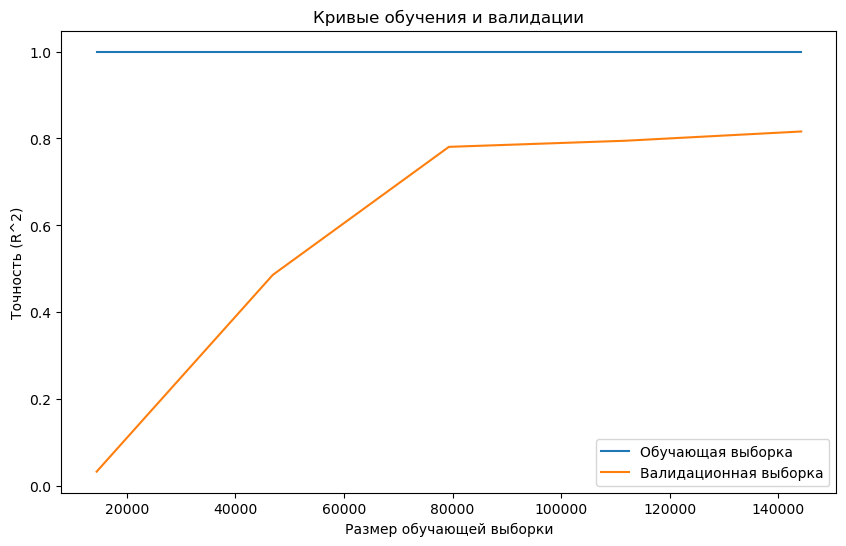

In [53]:
plt.figure(figsize=(10, 6)) 
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Обучающая выборка') 
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Валидационная выборка') 
plt.xlabel('Размер обучающей выборки') 
plt.ylabel('Точность (R^2)') 
plt.title('Кривые обучения и валидации') 
plt.legend() 
plt.show() #можно увидеть как обучалась и изменялась точность в лучшую сторону

# 3.3 Оптимизация модели

In [54]:
df['First Visit Date'] = pd.to_datetime(df['First Visit Date']) #добавление новых колонк (переобразование колонки с временем)
df['Year'] = df['First Visit Date'].dt.year 
df['Month'] = df['First Visit Date'].dt.month 
df['Day'] = df['First Visit Date'].dt.day

In [55]:
df

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue,dt,costs,First Visit Date,Year,Month,Day
24,188246423999,Russia,Android,FaceBoom,2022-05-01 23:09:42,2022-05-01 23:21:06,2022-05-01 23:09:52,4.99,2022-05-01,113.300,2022-05-01 23:09:42,2022,5,1
29,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 14:39:33,2022-05-02 06:30:36,4.99,2022-05-01,80.000,2022-05-01 13:25:07,2022,5,1
30,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 16:45:47,2022-05-04 23:46:23,5.99,2022-05-01,80.000,2022-05-01 13:25:07,2022,5,1
31,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 18:50:54,2022-05-12 22:02:22,4.99,2022-05-01,80.000,2022-05-01 13:25:07,2022,5,1
32,784885401335,Russia,iPhone,TipTop,2022-05-01 13:25:07,2022-05-01 13:53:48,2022-05-16 00:03:32,4.99,2022-05-01,80.000,2022-05-01 13:25:07,2022,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309893,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 07:38:52,2022-08-27 01:00:26,9.99,2022-08-20,339.000,2022-08-13 00:56:23,2022,8,13
309894,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 11:50:29,2022-08-29 19:09:30,4.99,2022-08-20,339.000,2022-08-13 00:56:23,2022,8,13
309895,21306099336,Russia,iPhone,TipTop,2022-08-20 19:44:54,2022-10-31 11:50:29,2022-09-13 05:01:23,4.99,2022-08-20,339.000,2022-08-13 00:56:23,2022,8,13
309899,429722749550,Russia,iPhone,RocketSuperAds,2022-08-20 00:28:18,2022-10-31 07:37:55,2022-08-16 15:43:38,4.99,2022-08-20,6.175,2022-08-13 06:48:00,2022,8,13


In [56]:
from sklearn import preprocessing 
 
def number_encode_features(init_df): 
    result = init_df.copy() # копируем нашу исходную таблицу 
    encoders = {} 
    for column in result.columns: 
        if result.dtypes[column] == object:  # заменяем np.object на object 
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик 
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец 
    return result, encoders 
 
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные категориальные признаки 
encoded_data.head() # проверяем

,User Id,Region,Device,Channel,Session Start,Session End,Event Dt,Revenue,dt,costs,First Visit Date,Year,Month,Day
24,188246423999,0,0,0,2022-05-01 23:09:42,2022-05-01 23:21:06,2022-05-01 23:09:52,4.99,0,113.3,2022-05-01 23:09:42,2022,5,1
29,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 14:39:33,2022-05-02 06:30:36,4.99,0,80.0,2022-05-01 13:25:07,2022,5,1
30,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 16:45:47,2022-05-04 23:46:23,5.99,0,80.0,2022-05-01 13:25:07,2022,5,1
31,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 18:50:54,2022-05-12 22:02:22,4.99,0,80.0,2022-05-01 13:25:07,2022,5,1
32,784885401335,0,3,3,2022-05-01 13:25:07,2022-05-01 13:53:48,2022-05-16 00:03:32,4.99,0,80.0,2022-05-01 13:25:07,2022,5,1


In [57]:
encoded_data =  encoded_data.drop([ 'Session Start', 'Session End','First Visit Date' ], axis=1) #удаляем старые колонки

In [58]:
X = np.array(encoded_data[encoded_data._get_numeric_data().columns].drop('costs', axis=1)) #помещаем в перменную X наши обработанные и закодированные данные
y = np.array(encoded_data['costs'])  #помещаем в перменную y колонку, которую мы будем предсказывать

In [59]:
X #поверка

array([[1.88246424e+11, 0.00000000e+00, 0.00000000e+00, ...,
        2.02200000e+03, 5.00000000e+00, 1.00000000e+00],
       [7.84885401e+11, 0.00000000e+00, 3.00000000e+00, ...,
        2.02200000e+03, 5.00000000e+00, 1.00000000e+00],
       [7.84885401e+11, 0.00000000e+00, 3.00000000e+00, ...,
        2.02200000e+03, 5.00000000e+00, 1.00000000e+00],
       ...,
       [2.13060993e+10, 0.00000000e+00, 3.00000000e+00, ...,
        2.02200000e+03, 8.00000000e+00, 1.30000000e+01],
       [4.29722750e+11, 0.00000000e+00, 3.00000000e+00, ...,
        2.02200000e+03, 8.00000000e+00, 1.30000000e+01],
       [4.29722750e+11, 0.00000000e+00, 3.00000000e+00, ...,
        2.02200000e+03, 8.00000000e+00, 1.30000000e+01]])

In [60]:
y #поверка

array([113.3  ,  80.   ,  80.   , ..., 339.   ,   6.175,   6.175])

In [61]:
#Стандартизация данных
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [62]:
# Построение кривых обучения и валидации 
train_sizes, train_scores, valid_scores = learning_curve(best_model, X, y, cv=10) 

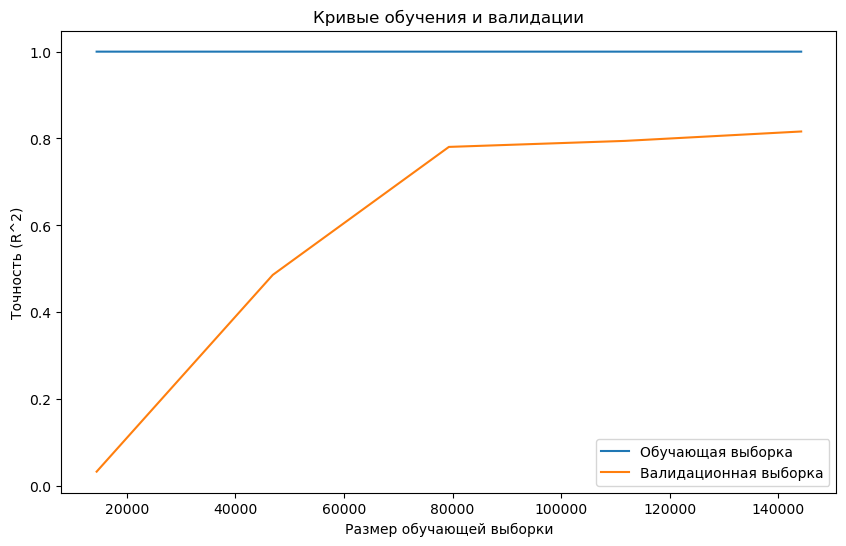

In [63]:
plt.figure(figsize=(10, 6)) 
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Обучающая выборка') 
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Валидационная выборка') 
plt.xlabel('Размер обучающей выборки') 
plt.ylabel('Точность (R^2)') 
plt.title('Кривые обучения и валидации') 
plt.legend() 
plt.show() #новый график для новых данных

In [64]:
import joblib 
 
#сохранение модели с лучшими параметрами (для api)
joblib.dump(best_model, 'best_model.pkl') 
 

['best_model.pkl']

В итоге лучшей моделью оказалась RandomForestRegressor c n_estimators = 150 с изначальным набоором данных
Средняя абсолютная ошибка (MAE): 0.00
Средняя квадратичная ошибка (MSE): 0.00
Корень из среднеквадратичной ошибки (RMSE): 0.00
Точность модели (R^2): 100.00% (без валидации)
Точность модели после настройки гиперпараметров (R^2): 0.816132176465541 (по валидации)